In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
data = pd.read_csv("New York City Taxi Trip Duration.csv")
X = data[['pickup_latitude' , 'pickup_longitude']].values

X_min = X.min(axis=0)
X_max = X.max(axis=0) 
X = (X - X_min) / (X_max - X_min)
print(X)


plt.scatter(data['pickup_latitude'] , data['pickup_longitude'])
plt.savefig(f"plots1/scatter.png")
plt.close()



[[0.65012708 0.52520897]
 [0.52703934 0.52922131]
 [0.63337433 0.53242412]
 ...
 [0.49753026 0.50604487]
 [0.56935273 0.5008535 ]
 [0.56465302 0.61360316]]


min_pts=5, eps=0.1, clusters=2
min_pts=5, eps=0.2, clusters=1
min_pts=10, eps=0.1, clusters=2
min_pts=10, eps=0.2, clusters=2
min_pts=15, eps=0.1, clusters=2
min_pts=15, eps=0.2, clusters=2

Best parameters (grid search): (5, 0.1)


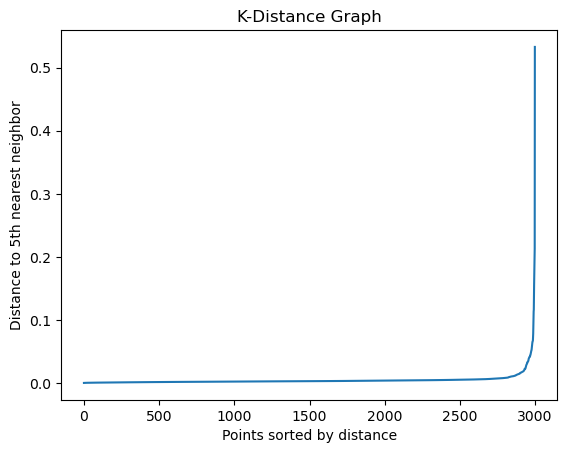

In [ ]:
def euclidean_distance(a, b):
    return sqrt(np.sum((a - b) ** 2))


def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean_distance(X[point_idx], X[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(X, labels, point_idx, cluster_id, eps, min_pts):
    neighbors = region_query(X, point_idx, eps)
    if len(neighbors) < min_pts:
        labels[point_idx] = -1  # noise
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            n = neighbors[i]
            if labels[n] == -1:
                labels[n] = cluster_id
            elif labels[n] == 0:
                labels[n] = cluster_id
                new_neighbors = region_query(X, n, eps)
                if len(new_neighbors) >= min_pts:
                    neighbors += new_neighbors
            i += 1
        return True
    

def dbscan(X, eps, min_pts):
    cluster_id = 0
    labels = np.zeros(X.shape[0])
    for i in range(len(X)):
        if labels[i] == 0:
            if expand_cluster(X, labels, i, cluster_id + 1, eps, min_pts):
                cluster_id += 1
    return labels



min_pts_values = [5,10,15]
eps_values = [0.1, 0.2]

best_config = None
best_clusters = 0


for min_pts in min_pts_values:
    for eps in eps_values:

        labels = dbscan(X, eps, min_pts)
        clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"min_pts={min_pts}, eps={eps}, clusters={clusters}")
        if clusters > best_clusters:
            best_clusters = clusters
            best_config = (min_pts, eps)

print("\nBest parameters (grid search):", best_config)


from sklearn.neighbors import NearestNeighbors

min_pts_opt = best_config[0]
neighbors = NearestNeighbors(n_neighbors=min_pts_opt)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {min_pts_opt}th nearest neighbor")
plt.show()

eps_opt = best_config[1]
labels_final = dbscan(X, eps_opt, min_pts_opt)



In [25]:
def func():
        results = []
        labels = labels_final
        
        
        clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"min_pts={min_pts}, eps={eps}, clusters={clusters}")

        print(clusters)

        pickup = len(labels) - (1 if -1 in labels else 0)
        pickup = pickup - (1 if 0 in labels else 0)

        print("pickup" , pickup)
        results.append(pickup)

        results.append(clusters)


        avg_trip_duration = []
        for i in range(clusters):
            avg_trip_duration.append([])
        
        for i in range(len(labels)):
            if labels[i] != -1:
                print(labels[i])
                avg_trip_duration[int(labels[i])-1].append(X[i])
        
        avg = []
        for i in avg_trip_duration:
            print(i)
            avg.append(np.mean(i))
        
        print(avg)
        # results.append(avg)
        
        print(results)
        a = []
        a.append(results)
        df_results = pd.DataFrame(a, columns=["pickup", "centroids"])
        df_results.to_csv("results1/pickup_centre.csv", index=False)

        df_results = pd.DataFrame(avg, columns=["avg"])
        df_results.to_csv(f"results1/avg.csv", index=False)

        outliners = []
        for i in range(len(labels)):
            if(labels[i] == -1):
                outliners.append(X[i])

        print(outliners)
        # a = []
        # a.append(outliners)
        # print(a)
        df_results = pd.DataFrame(outliners, columns=["X" , "Y"])
        df_results.to_csv(f"results1/outliners.csv", index=False)
        

func()

min_pts=15, eps=0.2, clusters=2
2
pickup 2998
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
2.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.

In [20]:
def silhouette_score(labels):
    data = X
    n = len(data)
    sil = np.zeros(n)
    for i in range(n):
        same_cluster = [euclidean_distance(data[i], data[j]) for j in range(n) if labels[j] == labels[i] and j != i]
        a = np.mean(same_cluster) if same_cluster else 0

        other_means = []
        for k in np.unique(labels):
            if k != labels[i]:
                other = [euclidean_distance(data[i], data[j]) for j in range(n) if labels[j] == k]
                if other:
                    other_means.append(np.mean(other))
        b = min(other_means) if other_means else 0

        sil[i] = 0 if max(a, b) == 0 else (b - a) / max(a, b)
    return np.mean(sil)

print(labels_final)
score = silhouette_score(labels_final)
print(score)

a = []
a.append(score)

df_results = pd.DataFrame(a, columns=["silhouette_score"])

df_results.to_csv(f"results1/silhouette_score.csv", index=False)

[1. 1. 1. ... 1. 1. 1.]
0.7358588781303153
